Implementing SVM


importing required libraries:

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [8]:
# Load the dataset
df = pd.read_csv('/content/cleaned_data_DX.csv')

In [9]:
print(df)

     Gender  Age Handedness  DX  ADHD Measure  ADHD Index  Inattentive  \
0         1   17          1   0             2        52.0         52.0   
1         1   16          1   0             2        30.0         29.0   
2         0   15          1   0             2        30.0         29.0   
3         0   15          1   0             2        30.0         29.0   
4         1   17          0   0             2        52.0         52.0   
..      ...  ...        ...  ..           ...         ...          ...   
545       1   12          1   0             2        23.0         22.0   
546       1   14          1   0             2        30.0         29.0   
547       0   13          0   0             2        23.0         22.0   
548       1   16          1   0             2        30.0         29.0   
549       0   10          1   0             2        37.0         41.0   

     Hyper/Impulsive  IQ Measure  Verbal IQ  Performance IQ  Full4 IQ  \
0               50.0           2      

In [10]:
df_filled = df.apply(lambda x: x.fillna(x.mode()[0]))

In [11]:
# Count the number of missing values in each column
missing_values = df_filled.isnull().sum()

# Print the missing values count
print("Missing values in the DataFrame:")
print(missing_values)


Missing values in the DataFrame:
Gender             0
Age                0
Handedness         0
DX                 0
ADHD Measure       0
ADHD Index         0
Inattentive        0
Hyper/Impulsive    0
IQ Measure         0
Verbal IQ          0
Performance IQ     0
Full4 IQ           0
Med Status         0
dtype: int64


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


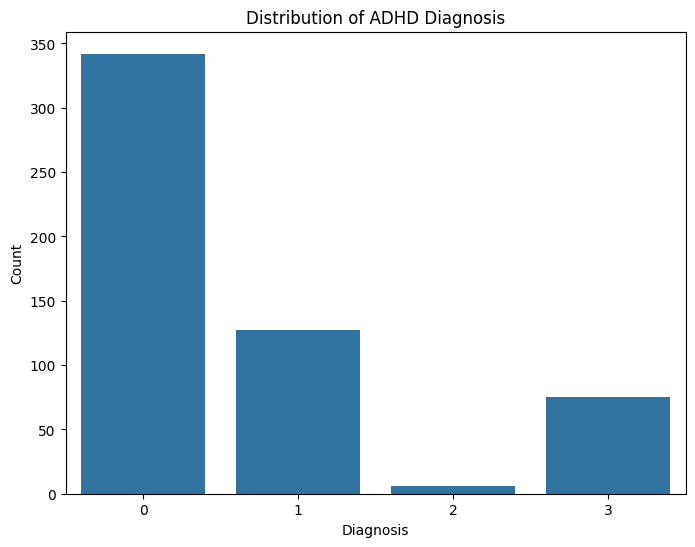

ValueError: could not convert string to float: 'L'

<Figure size 1000x800 with 0 Axes>

In [14]:
# Visualize the distribution of the target variable (DX)
plt.figure(figsize=(8, 6))
sns.countplot(x='DX', data=df)
plt.title('Distribution of ADHD Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


# Visualize the correlation matrix of features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

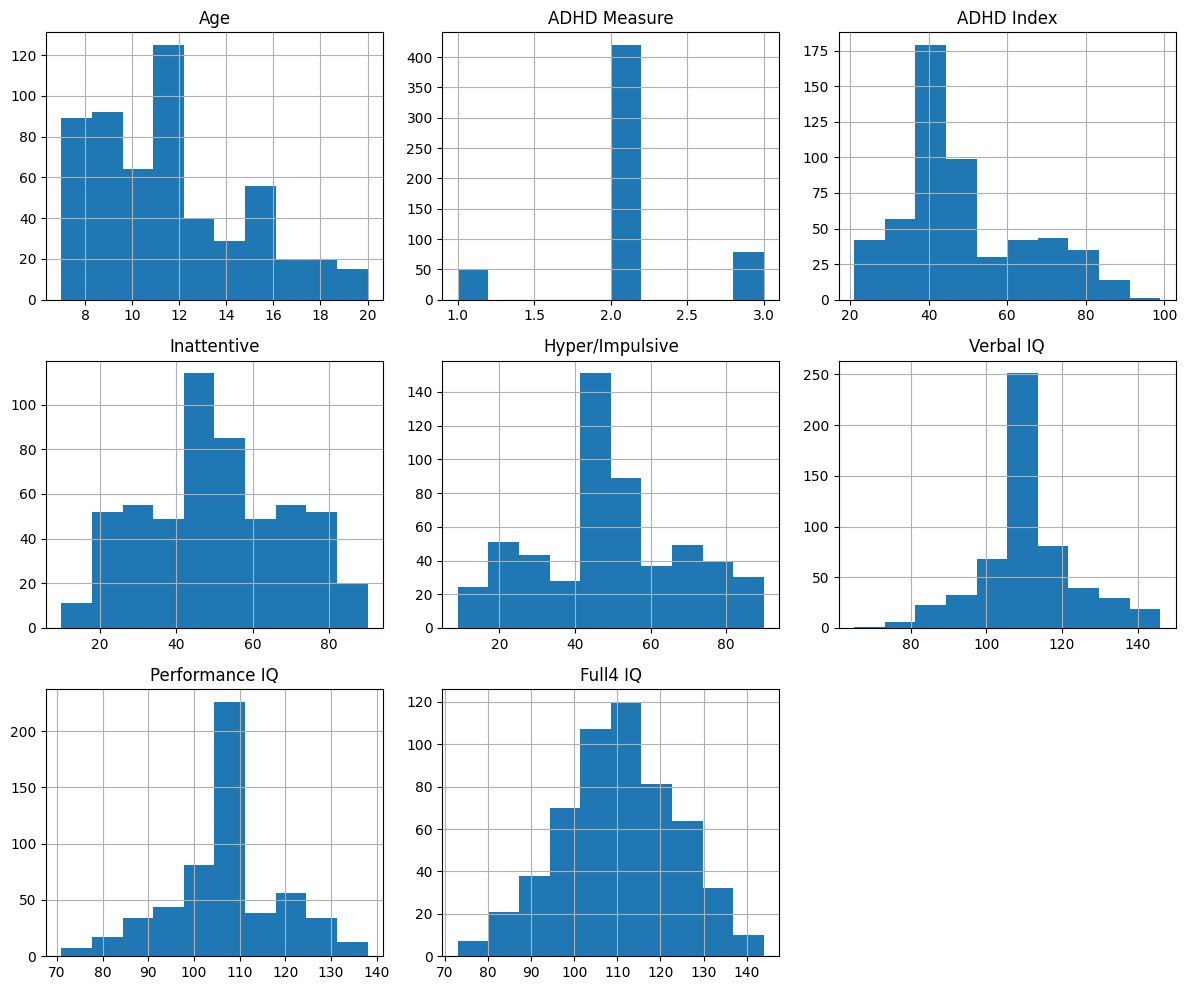

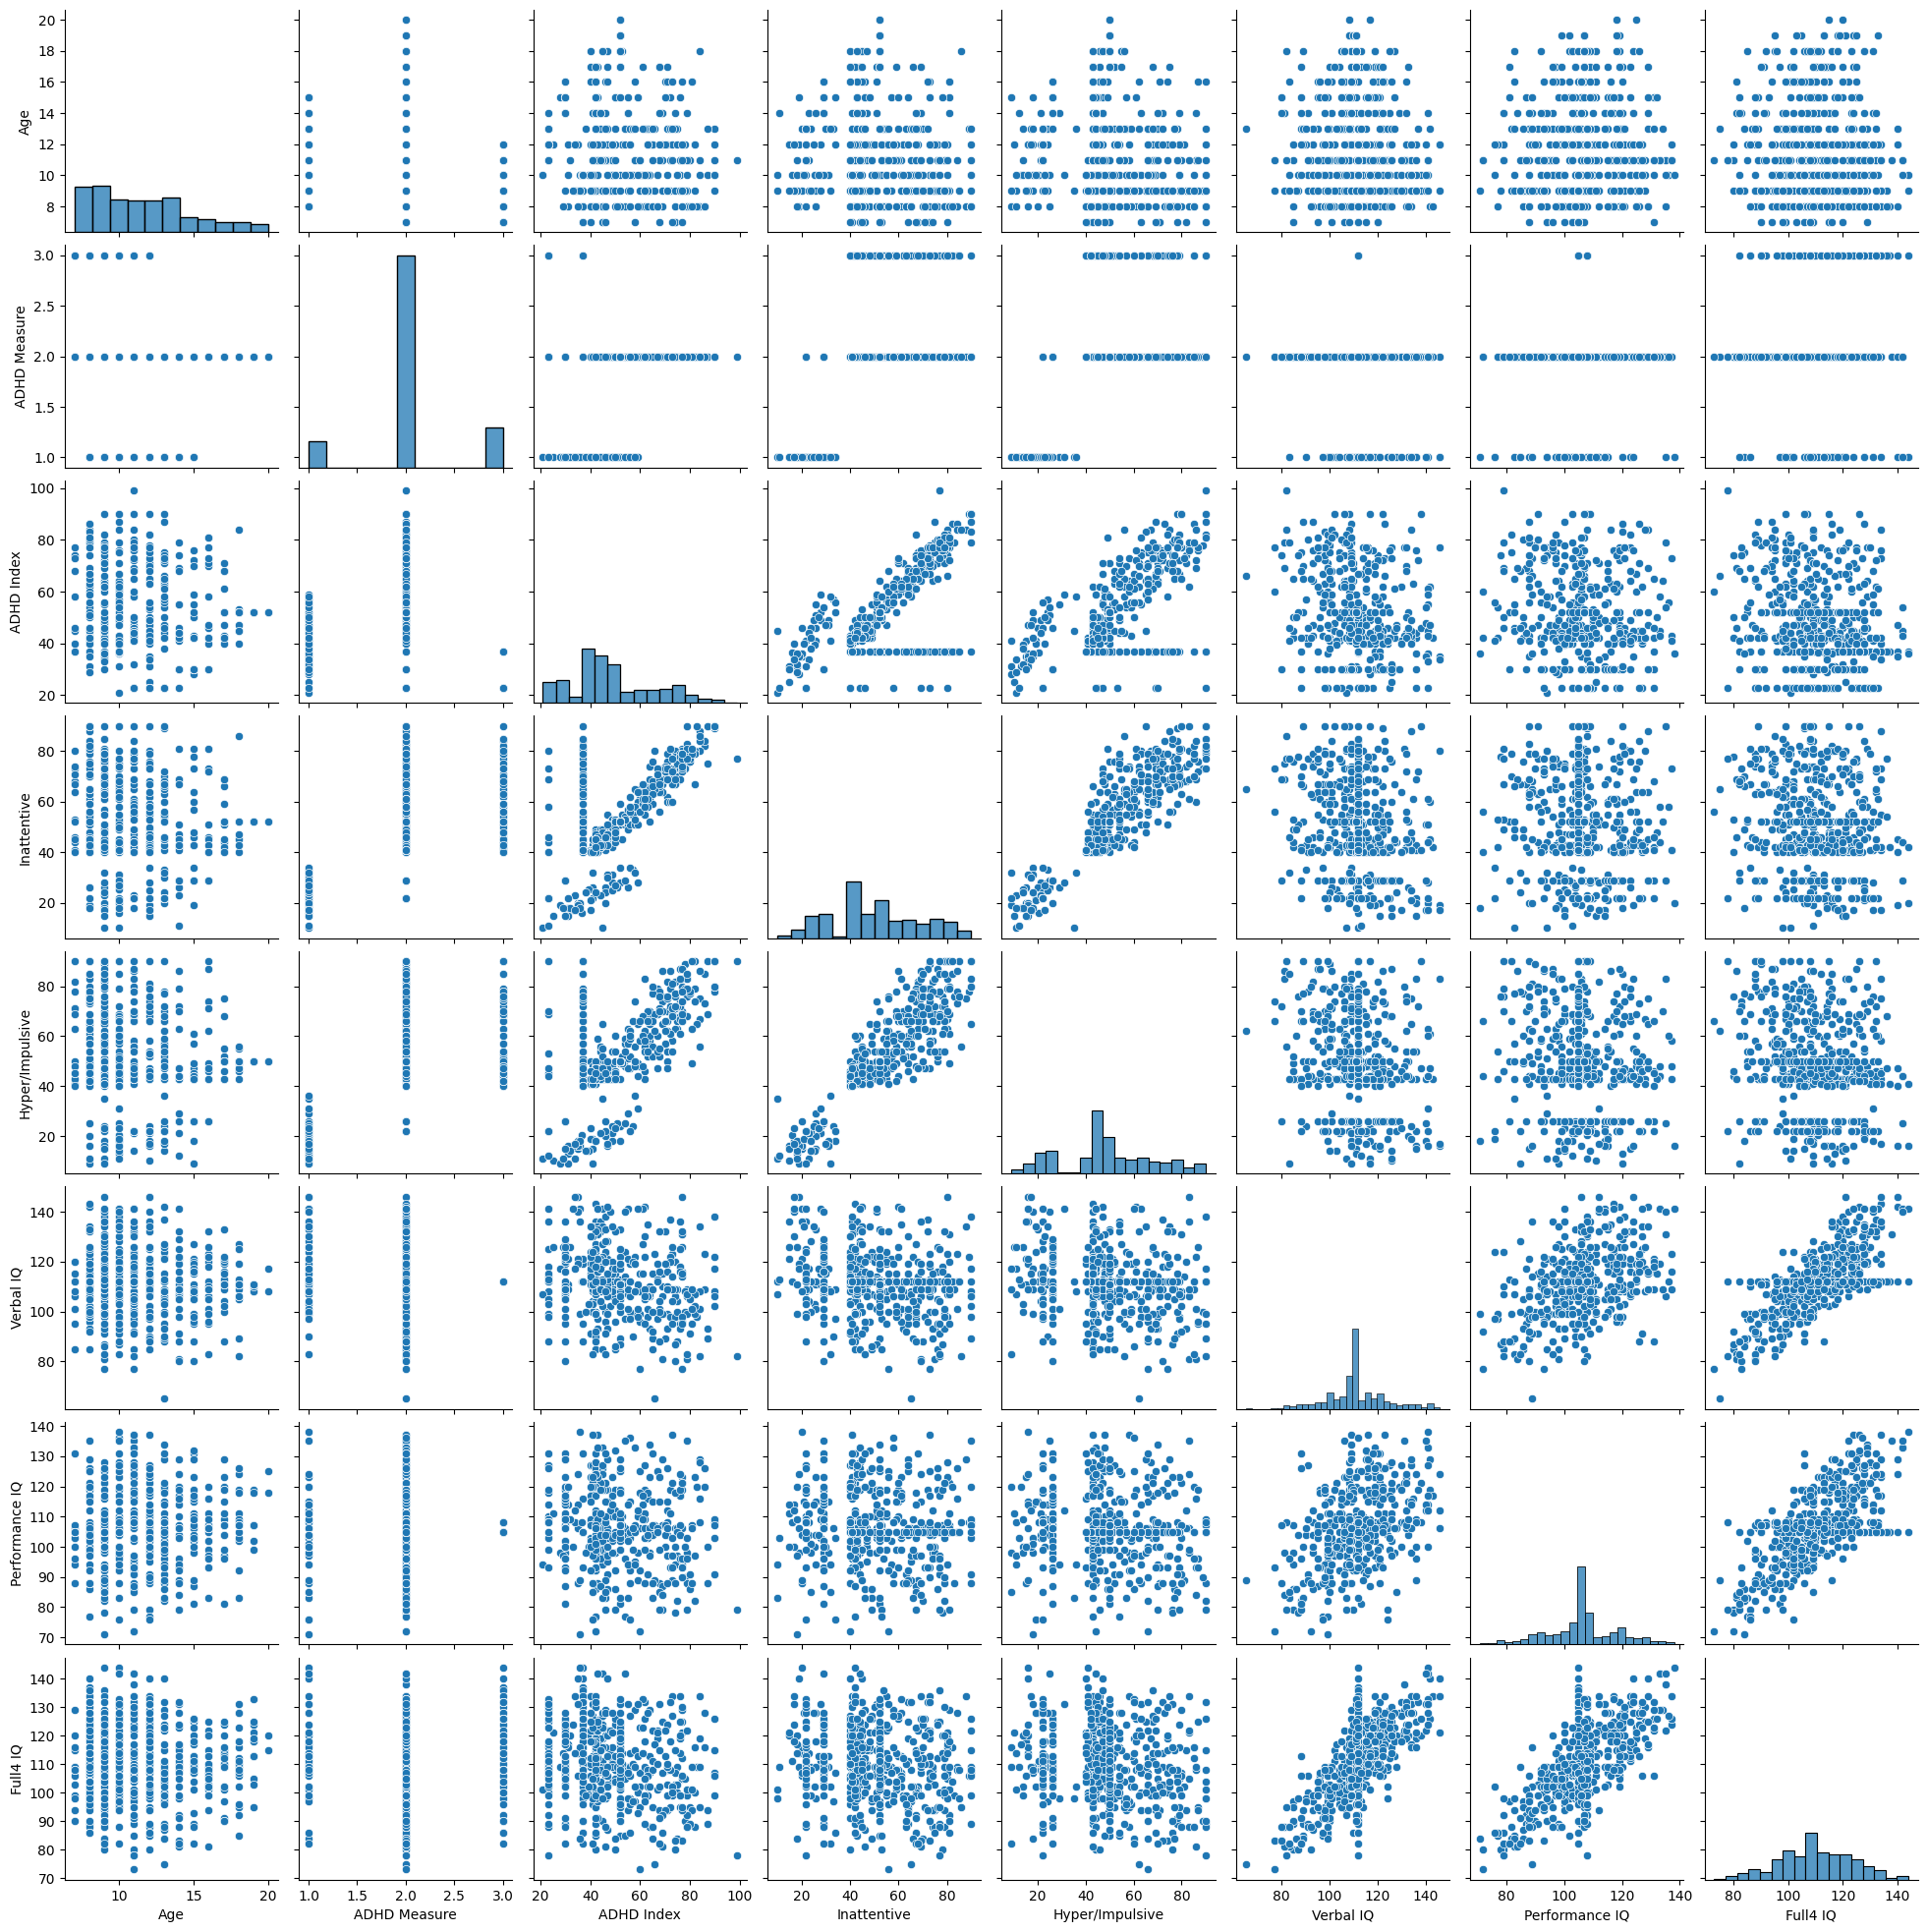

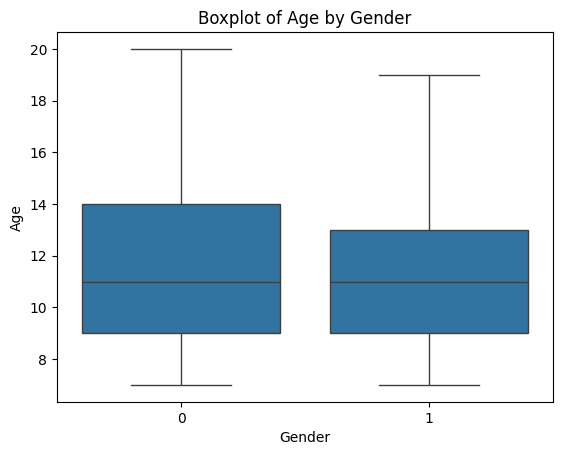

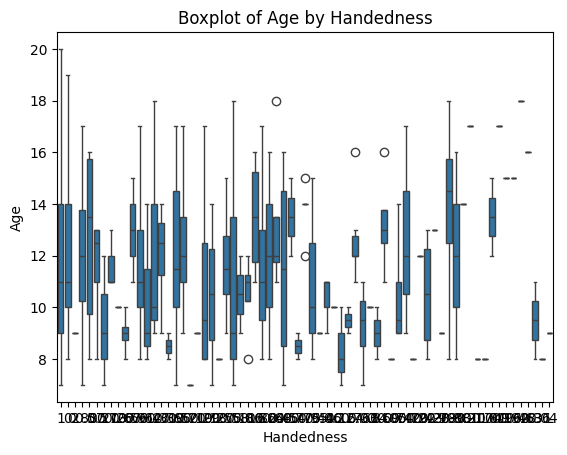

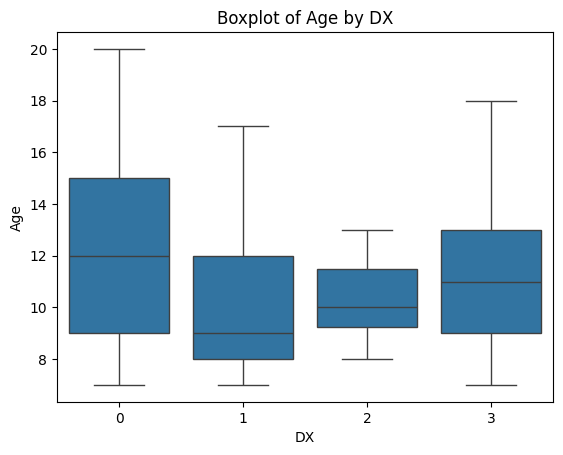

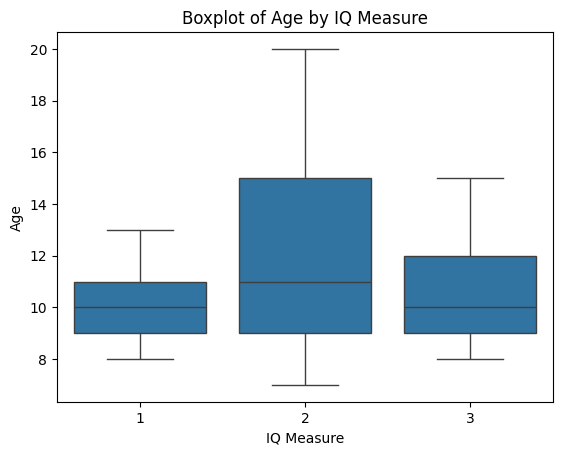

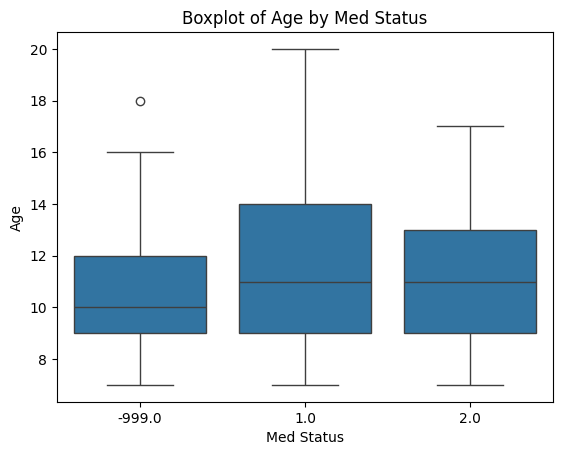

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numeric features
numeric_features = ['Age', 'ADHD Measure', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive',
                    'Verbal IQ', 'Performance IQ', 'Full4 IQ']
data_numeric = df[numeric_features]
data_numeric.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Plot scatter matrix for numeric features
sns.pairplot(data_numeric)
plt.show()

# Plot box plots for categorical features
categorical_features = ['Gender', 'Handedness', 'DX', 'IQ Measure', 'Med Status']
for feature in categorical_features:
    sns.boxplot(x=feature, y='Age', data=df)
    plt.title(f'Boxplot of Age by {feature}')
    plt.show()


Splitting dataset into train and test models & preprocessing

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features (X) and target variable (y)
X = df.drop(columns=['DX'])  # Features
y = df['DX']                  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numeric features
categorical_features = ['Gender', 'Handedness']
numeric_features = ['Age', 'ADHD Measure', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive',
                    'Verbal IQ', 'Performance IQ', 'Full4 IQ']

# Define preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown='ignore')  # Specify categories and handle unknown

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define pipeline with preprocessing and scaling steps
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
X_train_scaled = pipeline.fit_transform(X_train)

# Transform the testing data
X_test_scaled = pipeline.transform(X_test)


In [17]:
# Number of original numeric features
num_numeric_features = len(numeric_features)
print(num_numeric_features)
# Number of unique categories in each categorical feature
num_categories = X_train[categorical_features].nunique()
print(num_categories)
# Total number of binary features after one-hot encoding
# num_binary_features = sum(num_categories)
# print(num_binary_features)
# Total number of features after preprocessing
total_features_after_preprocessing = num_numeric_features + num_categories

print("Total number of features after preprocessing:", total_features_after_preprocessing)


8
Gender         2
Handedness    65
dtype: int64
Total number of features after preprocessing: Gender        10
Handedness    73
dtype: int64


Checking if there is any null values left:

In [18]:
# Check for NaN values in the training data
print("NaN values in training data:")
print(X_train.isnull().sum())

# Check for NaN values in the testing data
print("NaN values in testing data:")
print(X_test.isnull().sum())


NaN values in training data:
Gender             0
Age                0
Handedness         2
ADHD Measure       0
ADHD Index         7
Inattentive        7
Hyper/Impulsive    7
IQ Measure         0
Verbal IQ          0
Performance IQ     0
Full4 IQ           0
Med Status         1
dtype: int64
NaN values in testing data:
Gender             0
Age                0
Handedness         0
ADHD Measure       0
ADHD Index         1
Inattentive        1
Hyper/Impulsive    1
IQ Measure         0
Verbal IQ          0
Performance IQ     0
Full4 IQ           0
Med Status         0
dtype: int64


Training the model and evaluation:

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM classifier
svm_model = SVC()

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred = svm_model.predict(X_test_scaled)

# Predict the target variable on the training set
y_train_pred = svm_model.predict(X_train_scaled)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(" Testing Accuracy:", accuracy)


ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Building a detection system:

Input test 1:

*   reality - > doesnt have adhd
*   predicted - > doesnt have adhd





In [ ]:
import numpy as np

# Sample input data as a dictionary
input_data = {
    'Gender': [1],
    'Age': [17],
    'Handedness': [1],
    'ADHD Measure': [2],
    'ADHD Index': [52],
    'Inattentive': [52],
    'Hyper/Impulsive': [50],
    'IQ Measure': [2],
    'Verbal IQ': [133],
    'Performance IQ': [104],
    'Full4 IQ': [120],
    'Med Status': [1]
}

# Create a DataFrame from the input data dictionary
input_df = pd.DataFrame(input_data)

# Reorder the DataFrame columns to match the order of features used during training
input_df = input_df[['Gender', 'Age', 'Handedness', 'ADHD Measure', 'ADHD Index',
                     'Inattentive', 'Hyper/Impulsive', 'Verbal IQ', 'Performance IQ',
                     'Full4 IQ', 'Med Status']]

# Ensure that the categorical features have the correct data types
input_df[categorical_features] = input_df[categorical_features].astype(str)

# Preprocess the input data using the same preprocessing steps as the training data
input_features_scaled = pipeline.transform(input_df)

# Predict if the person has ADHD or not
prediction = svm_model.predict(input_features_scaled)

# Print the preprocessed input features
print("Preprocessed input features:")
print(input_features_scaled)

# Print the prediction
if prediction[0] == 0:
    print("The person does not have ADHD.")
else:
    print("The person has ADHD.")


Input test 2 :


*   reality -> has adhd
*  predicted -> has adhd







In [ ]:
import numpy as np

# Sample input data as a dictionary
input_data = {
    'Gender': [0],
    'Age': [10],
    'Handedness': [1],
    'ADHD Measure': [2],
    'ADHD Index': [87],
    'Inattentive': [75],
    'Hyper/Impulsive': [69],
    'IQ Measure': [1],
    'Verbal IQ': [93],
    'Performance IQ': [100],
    'Full4 IQ': [94],
    'Med Status': [1]
}

# Create a DataFrame from the input data dictionary
input_df = pd.DataFrame(input_data)

# Reorder the DataFrame columns to match the order of features used during training
input_df = input_df[['Gender', 'Age', 'Handedness', 'ADHD Measure', 'ADHD Index',
                     'Inattentive', 'Hyper/Impulsive', 'Verbal IQ', 'Performance IQ',
                     'Full4 IQ', 'Med Status']]

# Ensure that the categorical features have the correct data types
input_df[categorical_features] = input_df[categorical_features].astype(str)

# Preprocess the input data using the same preprocessing steps as the training data
input_features_scaled = pipeline.transform(input_df)

# Predict if the person has ADHD or not
prediction = svm_model.predict(input_features_scaled)

# Print the preprocessed input features
print("Preprocessed input features:")
print(input_features_scaled)


print("DX Measure:",prediction)
# Print the prediction
if prediction[0] == 0:
    print("The person does not have ADHD.")
else:
    print("The person has ADHD.")


Input test 3: (Wrong prediction)

*   Reality -> has adhd (dx > 1)
*   predicted - > doesnt not have adhd



In [ ]:
import numpy as np

# Sample input data as a dictionary
input_data = {
    'Gender': [1],
    'Age': [12],
    'Handedness': [1],
    'ADHD Measure': [2],
    'ADHD Index': [53],
    'Inattentive': [55],
    'Hyper/Impulsive': [52],
    'IQ Measure': [1],
    'Verbal IQ': [108],
    'Performance IQ': [110],
    'Full4 IQ': [114],
    'Med Status': [1]
}

# Create a DataFrame from the input data dictionary
input_df = pd.DataFrame(input_data)

# Reorder the DataFrame columns to match the order of features used during training
input_df = input_df[['Gender', 'Age', 'Handedness', 'ADHD Measure', 'ADHD Index',
                     'Inattentive', 'Hyper/Impulsive', 'Verbal IQ', 'Performance IQ',
                     'Full4 IQ', 'Med Status']]

# Ensure that the categorical features have the correct data types
input_df[categorical_features] = input_df[categorical_features].astype(str)

# Preprocess the input data using the same preprocessing steps as the training data
input_features_scaled = pipeline.transform(input_df)

# Predict if the person has ADHD or not
prediction = svm_model.predict(input_features_scaled)

# Print the preprocessed input features
print("Preprocessed input features:")
print(input_features_scaled)


print("DX Measure:",prediction)
# Print the prediction
if prediction[0] == 0:
    print("The person does not have ADHD.")
else:
    print("The person has ADHD.")


Input test 4: (Wrong prediction)


*  Reality -> has adhd (dx > 2)
*  Predicted - > doesnt not have adhd



In [ ]:
import numpy as np

# Sample input data as a dictionary
input_data = {
    'Gender': [1],
    'Age': [10],
    'Handedness': [1],
    'ADHD Measure': [2],
    'ADHD Index': [64],
    'Inattentive': [61],
    'Hyper/Impulsive': [68],
    'IQ Measure': [1],
    'Verbal IQ': [110],
    'Performance IQ': [123],
    'Full4 IQ': [113],
    'Med Status': [1]
}

# Create a DataFrame from the input data dictionary
input_df = pd.DataFrame(input_data)

# Reorder the DataFrame columns to match the order of features used during training
input_df = input_df[['Gender', 'Age', 'Handedness', 'ADHD Measure', 'ADHD Index',
                     'Inattentive', 'Hyper/Impulsive', 'Verbal IQ', 'Performance IQ',
                     'Full4 IQ', 'Med Status']]

# Ensure that the categorical features have the correct data types
input_df[categorical_features] = input_df[categorical_features].astype(str)

# Preprocess the input data using the same preprocessing steps as the training data
input_features_scaled = pipeline.transform(input_df)

# Predict if the person has ADHD or not
prediction = svm_model.predict(input_features_scaled)

# Print the preprocessed input features
print("Preprocessed input features:")
print(input_features_scaled)


print("DX Measure:",prediction)
# Print the prediction
if prediction[0] == 0:
    print("The person does not have ADHD.")
else:
    print("The person has ADHD.")


Input test 4: (Wrong prediction)


*   Reality -> has adhd(dx > 3)
*   Predicted -> doesnt have adhd



In [ ]:
import numpy as np

# Sample input data as a dictionary
input_data = {
    'Gender': [1],
    'Age': [13],
    'Handedness': [0.91],
    'ADHD Measure': [2],
    'ADHD Index': [63],
    'Inattentive': [63],
    'Hyper/Impulsive': [52],
    'IQ Measure': [2],
    'Verbal IQ': [106],
    'Performance IQ': [91],
    'Full4 IQ': [99],
    'Med Status': [-999]
}

# Create a DataFrame from the input data dictionary
input_df = pd.DataFrame(input_data)

# Reorder the DataFrame columns to match the order of features used during training
input_df = input_df[['Gender', 'Age', 'Handedness', 'ADHD Measure', 'ADHD Index',
                     'Inattentive', 'Hyper/Impulsive', 'Verbal IQ', 'Performance IQ',
                     'Full4 IQ', 'Med Status']]

# Ensure that the categorical features have the correct data types
input_df[categorical_features] = input_df[categorical_features].astype(str)

# Preprocess the input data using the same preprocessing steps as the training data
input_features_scaled = pipeline.transform(input_df)

# Predict if the person has ADHD or not
prediction = svm_model.predict(input_features_scaled)

# Print the preprocessed input features
print("Preprocessed input features:")
print(input_features_scaled)


print("DX Measure:",prediction)
# Print the prediction
if prediction[0] == 0:
    print("The person does not have ADHD.")
else:
    print("The person has ADHD.")


<---------------Useless Code---------------->

In [ ]:
from sklearn.metrics import accuracy_score

# Predict the target variable on the testing set
y_pred_test = svm_model.predict(X_test_scaled)

# Calculate the accuracy on the testing data
accuracy_test = accuracy_score(y_test, y_pred_test)

# Convert accuracy to percentage
accuracy_test_percentage = accuracy_test * 100

print("Accuracy on testing data: {:.2f}%".format(accuracy_test_percentage))



In [ ]:
# Instantiate SimpleImputer with mean strategy for target variable
target_imputer = SimpleImputer(strategy='mean')

# Impute missing values in the target variable
y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1)).flatten()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable DX
y_train_encoded = label_encoder.fit_transform(y_train_imputed)

# Train the SVM classifier with the encoded target variable
svm_classifier.fit(X_train_imputed_df, y_train_encoded)


In [ ]:
from sklearn.svm import SVC

# Initialize the SVC classifier with random_state
svm_classifier = SVC(random_state=42)

# Train the SVC classifier
svm_classifier.fit(X_train_imputed_df, y_train_encoded)


In [ ]:
from sklearn.svm import SVC

# Initialize the SVC classifier with random_state
svm_classifier = SVC(random_state=42)

# Train the SVC classifier
svm_classifier.fit(X_train_imputed_df, y_train_encoded)


In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the training data
y_train_pred = svm_classifier.predict(X_train_imputed_df)

# Calculate accuracy on the training data
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
print("Training Accuracy:", train_accuracy)


In [ ]:
# Predict on the testing data
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Make predictions
y_test_pred = svm_classifier.predict(X_test_imputed_df)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Impute NaN values in y_test
imputer = SimpleImputer(strategy='most_frequent')
y_test_imputed = imputer.fit_transform(y_test.values.reshape(-1, 1)).flatten()

# Calculate accuracy score
accuracy = accuracy_score(y_test_imputed, y_test_pred)
print("Accuracy Score:", accuracy)


In [ ]:
import numpy as np

# Sample input data as a dictionary
input_data = {
    'Gender': 0,
    'Age': 15,
    'Handedness': 1,
    'ADHD Measure': 2,
    'ADHD Index': 30,
    'Inattentive': 29,
    'Hyper/Impulsive': 26,
    'IQ Measure': 2,
    'Verbal IQ': 116,
    'Performance IQ': 131,
    'Full4 IQ': 126,
    'Med Status': 1
}

# Convert input data into a 2D array-like format
input_array = np.array([[value for value in input_data.values()]])

# Make prediction
prediction = svm_classifier.predict(input_array)
print("ADHD Prediction:", prediction)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Assuming you have your features 'X' and target 'y' ready

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


ValueError: could not convert string to float: 'L'